In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()


In [3]:
print('Training Images: {}'.format(x_train.shape))
print('Testing Images: {}'.format(x_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [4]:
print(x_train[0].shape)

(32, 32, 3)


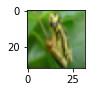

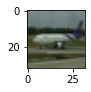

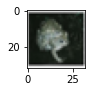

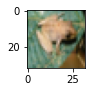

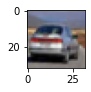

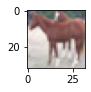

In [10]:
for i in range(232,238):
    plt.subplot(120+ 1 + i)
    img = x_train[i]
    plt.imshow(img)
    plt.show()

In [5]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test=x_test/255
n_classes = 10

print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model 
model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 678s 2s/step - loss: 1.8826 - accuracy: 0.2973 - val_loss: 1.2227 - val_accuracy: 0.5703
Epoch 2/5
391/391 [==============================] - 624s 2s/step - loss: 1.1920 - accuracy: 0.5751 - val_loss: 0.9446 - val_accuracy: 0.6757
Epoch 3/5
391/391 [==============================] - 640s 2s/step - loss: 0.9517 - accuracy: 0.6669 - val_loss: 0.8664 - val_accuracy: 0.7079
Epoch 4/5
391/391 [==============================] - 474s 1s/step - loss: 0.8152 - accuracy: 0.7148 - val_loss: 0.7351 - val_accuracy: 0.7432
Epoch 5/5
391/391 [==============================] - 283s 725ms/step - loss: 0.7288 - accuracy: 0.7492 - val_loss: 0.6994 - val_accuracy: 0.7585


In [7]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = x_test[100:109]
labels = np.argmax(y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)
print(predictions)

1/1 [==============================] - 1s 913ms/step
[[1.40464946e-03 1.94317487e-04 2.72510257e-02 3.71948034e-02
  5.41359901e-01 7.92853758e-02 4.11282014e-03 3.08000416e-01
  6.48584741e-04 5.48152253e-04]
 [6.22822437e-04 1.69465216e-04 2.71823648e-02 1.61823779e-01
  6.04997613e-02 5.67772746e-01 6.49834424e-02 1.15384512e-01
  5.68210147e-04 9.92822112e-04]
 [4.68825601e-05 3.68379369e-05 2.79230904e-02 1.83728300e-02
  2.46304582e-04 3.44601320e-03 9.49698389e-01 1.00999365e-04
  1.07486907e-04 2.10694052e-05]
 [6.20354142e-04 1.71416730e-04 9.94445849e-03 6.25264108e-01
  1.72289014e-02 5.48256598e-02 2.83838034e-01 4.99753002e-03
  3.84256913e-04 2.72521214e-03]
 [2.76643084e-04 9.85359609e-01 1.60225937e-07 2.00837491e-07
  1.07209344e-08 4.20946158e-08 1.49310342e-08 7.52008091e-08
  2.03322596e-03 1.23300692e-02]
 [1.02347431e-05 9.93124664e-01 9.70351977e-09 5.86911781e-08
  6.70639377e-10 3.63382591e-09 1.91116367e-08 3.38076456e-10
  2.22878836e-04 6.64214976e-03]
 [1.0

In [8]:
for image in predictions:
    print(np.sum(image))
    

1.0
1.0
0.9999998
0.9999999
1.0
1.0
0.99999994
1.0000001
1.0


In [9]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[4 5 6 3 1 1 2 6 8]


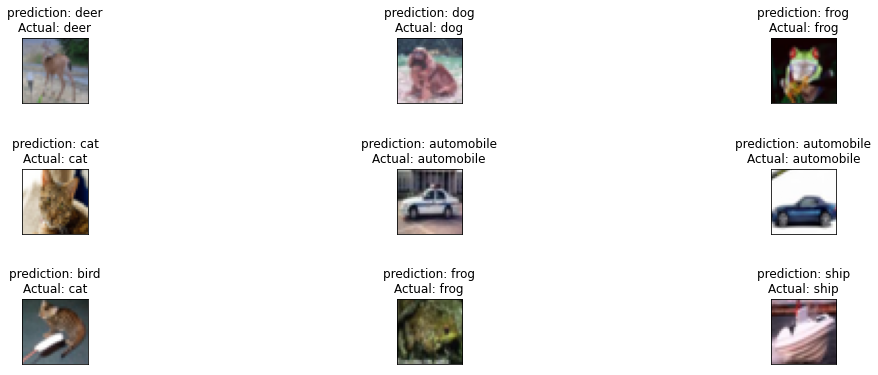

In [11]:
#FINAL OBJECT DETECTION
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
           
    # plot the image
    axs[i].imshow(img)
   
 # show the plot
plt.show()